In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\user\Downloads\healthy_lifestyle_city_2021.csv")
print(data.head())
print(data.describe())
print(data.columns)

         City  Rank Sunshine hours(City) Cost of a bottle of water(City)  \
0   Amsterdam     1                 1858                           £1.92   
1      Sydney     2                 2636                           £1.48   
2      Vienna     3                 1884                           £1.94   
3   Stockholm     4                 1821                           £1.72   
4  Copenhagen     5                 1630                           £2.19   

  Obesity levels(Country)  Life expectancy(years) (Country)  \
0                  20.40%                              81.2   
1                  29.00%                              82.1   
2                  20.10%                              81.0   
3                  20.60%                              81.8   
4                  19.70%                              79.8   

  Pollution(Index score) (City) Annual avg. hours worked  \
0                         30.93                     1434   
1                         26.86             

In [11]:
print(data.isnull().sum())

Rank                                0
Life expectancy(years) (Country)    0
Happiness levels(Country)           0
Outdoor activities(City)            0
Number of take out places(City)     0
dtype: int64


In [20]:
print(data.head())


   Rank  Life expectancy(years) (Country)  Happiness levels(Country)  \
0     1                              81.2                       7.44   
1     2                              82.1                       7.22   
2     3                              81.0                       7.29   
3     4                              81.8                       7.35   
4     5                              79.8                       7.64   

   Outdoor activities(City)  Number of take out places(City)  
0                       422                             1048  
1                       406                             1103  
2                       132                             1008  
3                       129                              598  
4                       154                              523  


In [22]:
print(data.describe())

            Rank  Life expectancy(years) (Country)  Happiness levels(Country)  \
count  44.000000                          44.00000                  44.000000   
mean   22.500000                          78.17500                   6.435000   
std    12.845233                           5.30437                   0.991202   
min     1.000000                          56.30000                   3.570000   
25%    11.750000                          75.40000                   5.870000   
50%    22.500000                          80.40000                   6.900000   
75%    33.250000                          81.80000                   7.175000   
max    44.000000                          83.20000                   7.800000   

       Outdoor activities(City)  Number of take out places(City)  
count                 44.000000                        44.000000  
mean                 213.977273                      1443.113636  
std                  127.190297                      1388.803270  
mi

In [28]:
print(data.columns)

Index(['Rank', 'Life expectancy(years) (Country)', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)'],
      dtype='object')


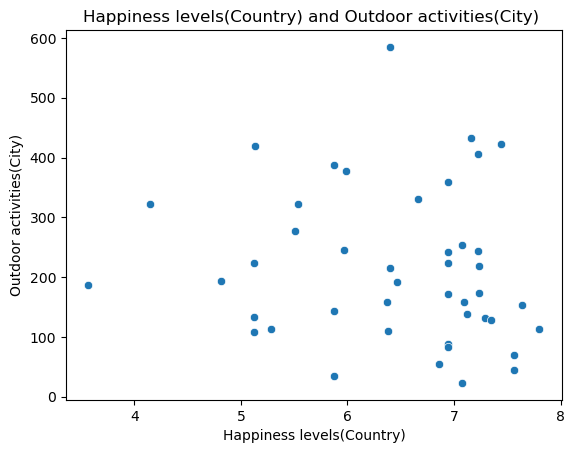

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Happiness levels(Country)", y="Outdoor activities(City)", data=data)
plt.title("Happiness levels(Country) and Outdoor activities(City) ")
plt.show()

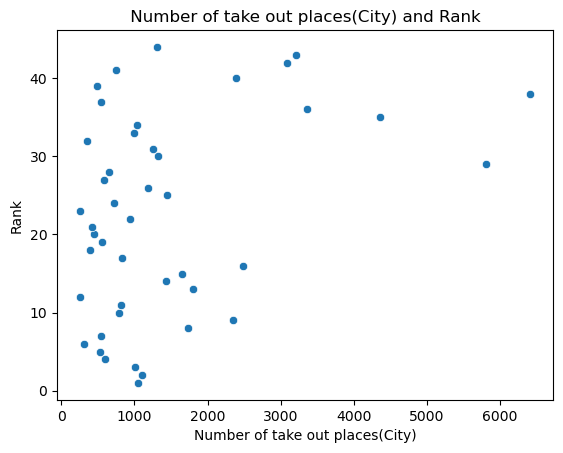

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Number of take out places(City)", y="Rank", data=data)
plt.title(" Number of take out places(City) and Rank ")
plt.show()

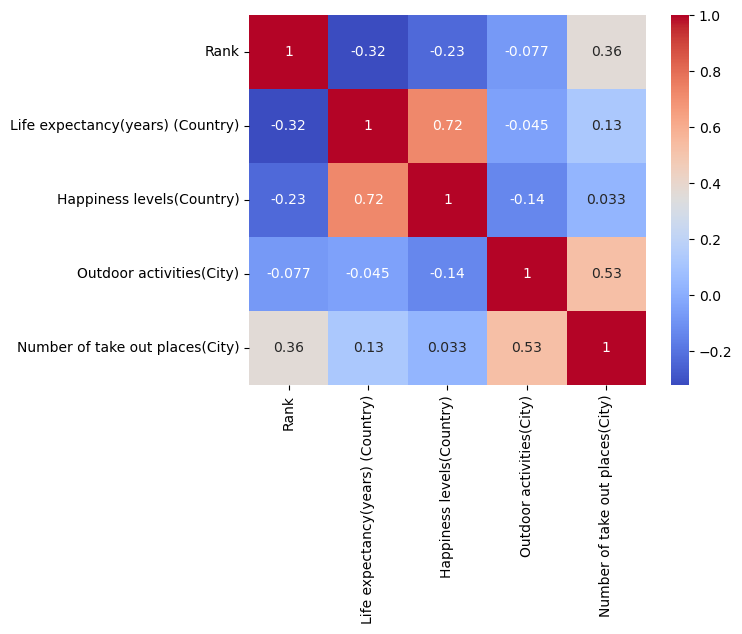

In [38]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[["Rank", "Outdoor activities(City)", "Life expectancy(years) (Country)"]]
y = data["Rank"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 2.634028475335881e-28


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

In [58]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
predictions.to_csv("predictions.csv", index=False)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[["Rank", "Number of take out places(City)", "Outdoor activities(City)"]] 
y = data["Outdoor activities(City)"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 7.202825971937985e-27


In [66]:
from tensorflow.keras import Input


model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Καθορισμός του σχήματος των εισόδων
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Αν πρόκειται για συνεχείς τιμές (π.χ., ρύπανση)
])


model.compile(optimizer='adam', loss='mse')  # MSE για συνεχή δεδομένα


model.fit(X_train, y_train, epochs=50, batch_size=32)


loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 220456.1875
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 153141.5781
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 103719.3047
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 63015.3047
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 39082.1328
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 27284.9414
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23376.0566
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 24263.8516 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 26091.7930
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 29111.0742
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 26304.5391
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 24277.9688
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 20614.1680
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 19495.4258
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [76]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("Data Analysis").getOrCreate()

data = spark.read.csv(r"C:\Users\user\Downloads\healthy_lifestyle_city_2021.csv", header=True, inferSchema=True)

data.show(5)

data.describe("`Annual avg. hours worked`").show()

data.select("column_name").show()

data.filter(data["column_name"] > 100).show()

+----------+----+--------------------+-------------------------------+-----------------------+--------------------------------+-----------------------------+------------------------+-------------------------+------------------------+-------------------------------+--------------------------------------+
|      City|Rank|Sunshine hours(City)|Cost of a bottle of water(City)|Obesity levels(Country)|Life expectancy(years) (Country)|Pollution(Index score) (City)|Annual avg. hours worked|Happiness levels(Country)|Outdoor activities(City)|Number of take out places(City)|Cost of a monthly gym membership(City)|
+----------+----+--------------------+-------------------------------+-----------------------+--------------------------------+-----------------------------+------------------------+-------------------------+------------------------+-------------------------------+--------------------------------------+
| Amsterdam|   1|                1858|                          £1.92|               

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Annual avg`.` hours worked` cannot be resolved. Did you mean one of the following? [`Annual avg. hours worked`].;
'Aggregate [map(cast(count as string), cast(count('Annual avg. hours worked) as string), cast(mean as string), cast(avg(try_cast('Annual avg. hours worked as double)) as string), cast(stddev as string), cast('stddev(try_cast('Annual avg. hours worked as double)) as string), cast(min as string), cast(min('Annual avg. hours worked) as string), cast(max as string), cast(max('Annual avg. hours worked) as string)) AS Annual avg. hours worked#691]
+- Project [Annual avg. hours worked#607]
   +- Relation [City#600,Rank#601,Sunshine hours(City)#602,Cost of a bottle of water(City)#603,Obesity levels(Country)#604,Life expectancy(years) (Country)#605,Pollution(Index score) (City)#606,Annual avg. hours worked#607,Happiness levels(Country)#608,Outdoor activities(City)#609,Number of take out places(City)#610,Cost of a monthly gym membership(City)#611] csv


In [78]:
print (data.columns)

['City', 'Rank', 'Sunshine hours(City)', 'Cost of a bottle of water(City)', 'Obesity levels(Country)', 'Life expectancy(years) (Country)', 'Pollution(Index score) (City)', 'Annual avg. hours worked', 'Happiness levels(Country)', 'Outdoor activities(City)', 'Number of take out places(City)', 'Cost of a monthly gym membership(City)']


In [80]:
# Μετονομάζουμε τη στήλη για να αποφύγουμε τυχόν προβλήματα
data = data.withColumnRenamed("Annual avg. hours worked", "Annual_avg_hours_worked")

# Εκτελούμε ξανά την περιγραφή
data.describe("Annual_avg_hours_worked").show()

+-------+-----------------------+
|summary|Annual_avg_hours_worked|
+-------+-----------------------+
|  count|                     44|
|   mean|      1672.909090909091|
| stddev|     179.62693346843267|
|    min|                      -|
|    max|                   2137|
+-------+-----------------------+



In [82]:
data.filter(data["Annual_avg_hours_worked"] > 2000).show()

+-----------+----+--------------------+-------------------------------+-----------------------+--------------------------------+-----------------------------+-----------------------+-------------------------+------------------------+-------------------------------+--------------------------------------+
|       City|Rank|Sunshine hours(City)|Cost of a bottle of water(City)|Obesity levels(Country)|Life expectancy(years) (Country)|Pollution(Index score) (City)|Annual_avg_hours_worked|Happiness levels(Country)|Outdoor activities(City)|Number of take out places(City)|Cost of a monthly gym membership(City)|
+-----------+----+--------------------+-------------------------------+-----------------------+--------------------------------+-----------------------------+-----------------------+-------------------------+------------------------+-------------------------------+--------------------------------------+
|Mexico City|  44|                2555|                          £0.45|              

In [92]:

data.createOrReplaceTempView("my_table")

result = spark.sql("SELECT Annual_avg_hours_worked FROM my_table WHERE Annual_avg_hours_worked > 100")

result.show()


+-----------------------+
|Annual_avg_hours_worked|
+-----------------------+
|                   1434|
|                   1712|
|                   1501|
|                   1452|
|                   1380|
|                   1540|
|                   1644|
|                   1386|
|                   1686|
|                   1670|
|                   1712|
|                   1670|
|                   1686|
|                   1967|
|                   1386|
|                   1557|
|                   1898|
|                   1832|
|                   1779|
|                   1779|
+-----------------------+
only showing top 20 rows



In [112]:

data = data.drop("features")

assembler = VectorAssembler(
    inputCols=["Annual_avg_hours_worked", "Pollution(Index score) (City)", "Sunshine hours(City)"],
    outputCol="features", handleInvalid="skip"
)

data = assembler.transform(data)

data.show(20)

+-----------+----+--------------------+-------------------------------+-----------------------+--------------------------------+-----------------------------+-----------------------+-------------------------+------------------------+-------------------------------+--------------------------------------+--------------------+
|       City|Rank|Sunshine hours(City)|Cost of a bottle of water(City)|Obesity levels(Country)|Life expectancy(years) (Country)|Pollution(Index score) (City)|Annual_avg_hours_worked|Happiness levels(Country)|Outdoor activities(City)|Number of take out places(City)|Cost of a monthly gym membership(City)|            features|
+-----------+----+--------------------+-------------------------------+-----------------------+--------------------------------+-----------------------------+-----------------------+-------------------------+------------------------+-------------------------------+--------------------------------------+--------------------+
|  Amsterdam|   1|    